In [2]:
%load_ext autoreload
%autoreload
import sem_expo
import poisson_hypergraph
import xgi
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools

In [3]:
func = sem_expo.sem_functions()
s_intial = np.array([1, 2, 1, 2, 0.5, 0.5, 0.5, 0.5])

In [4]:
g1_true_theta = [0.9, 0.1, 0.75, 0.25, 0.75, 0.25]
g2_true_theta = [0.6, 0.4, 0.75, 0.25, 0.75, 0.25]
g3_true_theta = [0.1, 0.9, 0.9, 0.1, 0.9, 0.1]
g4_true_theta = [0.6, 0.4, 0.9, 0.1, 0.9, 0.1]

Data with a specified number of timesteps

In [5]:
print("Graph 1")
GH1 = func.generate_hypergraph(g1_true_theta, 2000)
estimates1 = func.SEM(GH1, s_intial, 2000, 0.01, 0.001)
print("Graph 2")
GH2 = func.generate_hypergraph(g2_true_theta, 2000)
estimates2 = func.SEM(GH2, s_intial, 2000, 0.01, 0.001)
print("Graph 3")
GH3 = func.generate_hypergraph(g3_true_theta, 2000)
estimates3 = func.SEM(GH3, s_intial, 2000, 0.01, 0.001)
print("Graph 4")
GH4 = func.generate_hypergraph(g4_true_theta, 2000)
estimates4 = func.SEM(GH4, s_intial, 2000, 0.01, 0.001)

Graph 1
Graph 2
Graph 3
Graph 4


In [10]:
errors = []
for i in range(6):
    error_i = [abs(estimates1[-1][i + 1] - g1_true_theta[i]) / g1_true_theta[i], 
               abs(estimates2[-1][i + 1] - g2_true_theta[i]) / g2_true_theta[i],
               abs(estimates3[-1][i + 1] - g3_true_theta[i]) / g3_true_theta[i],
               abs(estimates4[-1][i + 1] - g4_true_theta[i]) / g4_true_theta[i]]
    errors.append(error_i)
errors = list(itertools.chain.from_iterable(errors))

In [11]:
sum(errors)/len(errors)

0.06778936413502902

In [12]:
max(errors)

0.2843590626627687

In [13]:
def viz_nolik(true_values1, estimates1, true_values2, estimates2, true_values3, estimates3, true_values4, estimates4):
    sns.set_style("whitegrid")
    sns.set_palette("Dark2")
    
    fig, axs = plt.subplots(3, 4, sharex = True, sharey = True)
    fig.set_figwidth(20)
    fig.set_figheight(7.5)

    plt.subplots_adjust(hspace = 0.4)
    plt.setp(axs, ylim=(0, 1.1))

    plt.rcParams.update({'font.size': 17})
    plt.rc('xtick', labelsize=13) 
    plt.rc('ytick', labelsize=13) 

    axs[0, 0].set_title(r'Graph 1 ' '\n'  '$\hat{p} = $' f'{estimates1[-1][1]:.2f}' ", " '$\hat{q} = $' f'{estimates1[-1][2]:.2f}')
    axs[0, 0].plot(estimates1[:, 0], [true_values1[0]] * len(estimates1[:, 0]), c = 'C0', linestyle = 'dotted', label = "$p$", linewidth=2.5)
    axs[0, 0].plot(estimates1[:, 0], estimates1[:, 1], label = "$\hat{p}$")
    axs[0, 0].plot(estimates1[:, 0], [true_values1[1]] * len(estimates1[:, 0]), c = 'C1', linestyle = 'dotted', label = "$q$", linewidth=2.5)
    axs[0, 0].plot(estimates1[:, 0], estimates1[:, 2], label = "$\hat{q}$")
    axs[0, 0].legend(loc='center left', bbox_to_anchor=(-0.6, 0.5))
    axs[1, 0].set_title('$\hat{\gamma}_{e, z_u} = $' f'{estimates1[-1][5]:.2f}' ", " '$\hat{\gamma}_{e, \\bar{z}_u} = $' f'{estimates1[-1][6]:.2f}')
    axs[1, 0].plot(estimates1[:, 0], [true_values1[4]] * len(estimates1[:, 0]), c = 'C0', linestyle = 'dotted', label = "$\gamma_{e, z_u}$", linewidth=2.5)
    axs[1, 0].plot(estimates1[:, 0], estimates1[:, 5], label = "$\hat{\gamma}_{e, z_u}$")
    axs[1, 0].plot(estimates1[:, 0], [true_values1[5]] * len(estimates1[:, 0]), c = 'C1', linestyle = 'dotted', label = "$\gamma_{e, \\bar{z}_u}$", linewidth=2.5)
    axs[1, 0].plot(estimates1[:, 0], estimates1[:, 6], label = "$\hat{\gamma}_{e, \\bar{z}_u}$")
    axs[1, 0].legend(loc='center left', bbox_to_anchor=(-0.6, 0.5))
    axs[2, 0].set_title('$\hat{\gamma}_{n, z_u} = $' f'{estimates1[-1][3]:.2f}' ", " '$\hat{\gamma}_{n, \\bar{z}_u} = $' f'{estimates1[-1][4]:.2f}')
    axs[2, 0].plot(estimates1[:, 0], [true_values1[2]] * len(estimates1[:, 0]), c = 'C0', linestyle = 'dotted', label = "$\gamma_{n, z_u}$", linewidth=2.5)
    axs[2, 0].plot(estimates1[:, 0], estimates1[:, 3], label = "$\hat{\gamma}_{n, z_u}$")
    axs[2, 0].plot(estimates1[:, 0], [true_values1[3]] * len(estimates1[:, 0]), c = 'C1', linestyle = 'dotted', label = '$\gamma_{n, \\bar{z}_u}$', linewidth=2.5)
    axs[2, 0].plot(estimates1[:, 0], estimates1[:, 4], label = "$\hat{\gamma}_{n, \\bar{z}_u}$")
    axs[2, 0].legend(loc='center left', bbox_to_anchor=(-0.6, 0.5))

    axs[0, 1].set_title(r'Graph 2 ' '\n'  '$\hat{p} = $' f'{estimates2[-1][1]:.2f}' ", " '$\hat{q} = $' f'{estimates2[-1][2]:.2f}')
    axs[0, 1].plot(estimates2[:, 0], [true_values2[0]] * len(estimates2[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[0, 1].plot(estimates2[:, 0], [true_values2[1]] * len(estimates2[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[0, 1].plot(estimates2[:, 0], estimates2[:, 1])
    axs[0, 1].plot(estimates2[:, 0], estimates2[:, 2])
    axs[1, 1].set_title('$\hat{\gamma}_{e, z_u} = $' f'{estimates2[-1][5]:.2f}' ", " '$\hat{\gamma}_{e, \\bar{z}_u} = $' f'{estimates2[-1][6]:.2f}')
    axs[1, 1].plot(estimates2[:, 0], [true_values2[4]] * len(estimates2[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[1, 1].plot(estimates2[:, 0], [true_values2[5]] * len(estimates2[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[1, 1].plot(estimates2[:, 0], estimates2[:, 5])
    axs[1, 1].plot(estimates2[:, 0], estimates2[:, 6])
    axs[2, 1].set_title('$\hat{\gamma}_{n, z_u} = $' f'{estimates2[-1][3]:.2f}' ", " '$\hat{\gamma}_{n, \\bar{z}_u} = $' f'{estimates2[-1][4]:.2f}')
    axs[2, 1].plot(estimates2[:, 0], [true_values2[2]] * len(estimates2[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[2, 1].plot(estimates2[:, 0], [true_values2[3]] * len(estimates2[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[2, 1].plot(estimates2[:, 0], estimates2[:, 3])
    axs[2, 1].plot(estimates2[:, 0], estimates2[:, 4])

    axs[0, 2].set_title(r'Graph 3 ' '\n'  '$\hat{p} = $' f'{estimates3[-1][1]:.2f}' ", " '$\hat{q} = $' f'{estimates3[-1][2]:.2f}')
    axs[0, 2].plot(estimates3[:, 0], [true_values3[0]] * len(estimates3[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[0, 2].plot(estimates3[:, 0], [true_values3[1]] * len(estimates3[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[0, 2].plot(estimates3[:, 0], estimates3[:, 1])
    axs[0, 2].plot(estimates3[:, 0], estimates3[:, 2])
    axs[1, 2].set_title('$\hat{\gamma}_{e, z_u} = $' f'{estimates3[-1][5]:.2f}' ", " '$\hat{\gamma}_{e, \\bar{z}_u} = $' f'{estimates3[-1][6]:.2f}')
    axs[1, 2].plot(estimates3[:, 0], [true_values3[4]] * len(estimates3[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[1, 2].plot(estimates3[:, 0], [true_values3[5]] * len(estimates3[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[1, 2].plot(estimates3[:, 0], estimates3[:, 5])
    axs[1, 2].plot(estimates3[:, 0], estimates3[:, 6])
    axs[2, 2].set_title('$\hat{\gamma}_{n, z_u} = $' f'{estimates3[-1][3]:.2f}' ", " '$\hat{\gamma}_{n, \\bar{z}_u}} = $' f'{estimates3[-1][4]:.2f}')
    axs[2, 2].plot(estimates3[:, 0], [true_values3[2]] * len(estimates3[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[2, 2].plot(estimates3[:, 0], [true_values3[3]] * len(estimates3[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[2, 2].plot(estimates3[:, 0], estimates3[:, 3])
    axs[2, 2].plot(estimates3[:, 0], estimates3[:, 4])

    axs[0, 3].set_title(r'Graph 4 ' '\n'  '$\hat{p} = $' f'{estimates4[-1][1]:.2f}' ", " '$\hat{q} = $' f'{estimates4[-1][2]:.2f}')
    axs[0, 3].plot(estimates4[:, 0], [true_values4[0]] * len(estimates4[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[0, 3].plot(estimates4[:, 0], [true_values4[1]] * len(estimates4[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[0, 3].plot(estimates4[:, 0], estimates4[:, 1])
    axs[0, 3].plot(estimates4[:, 0], estimates4[:, 2])
    axs[1, 3].set_title('$\hat{\gamma}_{e, z_u} = $' f'{estimates4[-1][5]:.2f}' ", " '$\hat{\gamma}_{e, \\bar{z}_u} = $' f'{estimates4[-1][6]:.2f}')
    axs[1, 3].plot(estimates4[:, 0], [true_values4[4]] * len(estimates4[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[1, 3].plot(estimates4[:, 0], [true_values4[5]] * len(estimates4[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[1, 3].plot(estimates4[:, 0], estimates4[:, 5])
    axs[1, 3].plot(estimates4[:, 0], estimates4[:, 6])
    axs[2, 3].set_title('$\hat{\gamma}_{n, z_u} = $' f'{estimates4[-1][3]:.2f}' ", " '$\hat{\gamma}_{n, \\bar{z}_u} = $' f'{estimates4[-1][4]:.2f}')
    axs[2, 3].plot(estimates4[:, 0], [true_values4[2]] * len(estimates4[:, 0]), c = 'C0', linestyle = 'dotted', linewidth=2.5)
    axs[2, 3].plot(estimates4[:, 0], [true_values4[3]] * len(estimates4[:, 0]), c = 'C1', linestyle = 'dotted', linewidth=2.5)
    axs[2, 3].plot(estimates4[:, 0], estimates4[:, 3])
    axs[2, 3].plot(estimates4[:, 0], estimates4[:, 4])


    axs[2, 0].set_xlabel("iterations")
    axs[2, 1].set_xlabel("iterations")
    axs[2, 2].set_xlabel("iterations")
    axs[2, 3].set_xlabel("iterations")

    fig.savefig('sem_convergence_longer.png', dpi=300, bbox_inches = "tight")

    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

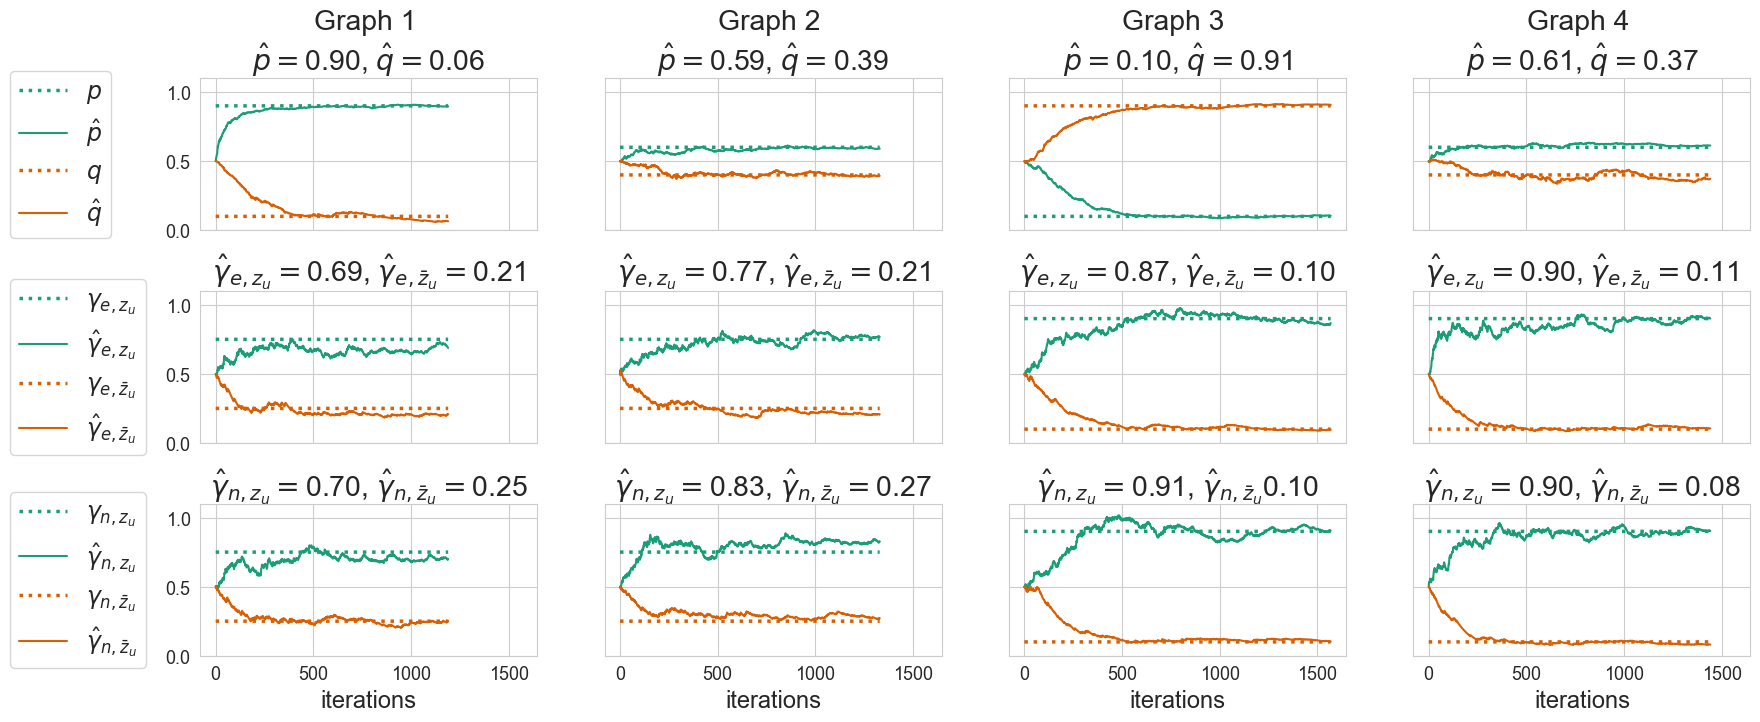

In [14]:
viz_nolik(g1_true_theta, np.array(estimates1), g2_true_theta, np.array(estimates2), g3_true_theta, np.array(estimates3), g4_true_theta, np.array(estimates4))